In [376]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [377]:
#read dataset
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Day 7-8/train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [378]:
#mengetahui informasi terkait dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [379]:
#mengetahui mengenai NaN yang ada pada dataframe
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Missing Values

In [380]:
#Mengisi NaN pada kolom "Age" menggunakan median
train['Age'] = train['Age'].fillna(train['Age'].median()) 

In [381]:
#mengetahui informasi terkait dataframe
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [382]:
#Mengisi NaN pada kolom "Embarked" menggunakan modus
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [383]:
#mengetahui informasi terkait dataframe
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [384]:
#Mengisi NaN pada kolom "Cabin" dengan mengisi kolom dengan "Unknown"
train['Cabin'] = np.where(train['Cabin'].isnull(),"Unknown",train['Cabin'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


In [385]:
#mengetahui informasi terkait dataframe
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Variabel

In [386]:
#memisahkan data numeric dan kategoric dalam dataframe
numerical_data = train.select_dtypes(include=[np.number]) #memilih data yang bersifat nurmerik
categorical_data = train.select_dtypes(exclude=[np.number]) #memilih data yang bersifat di luar numerik

In [387]:
#print data nurmerik
numerical_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,28.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [388]:
#print data kategorik
categorical_data

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,Unknown,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,Unknown,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,Unknown,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,Unknown,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,Unknown,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [389]:
#target keputusan = survived
decision_target = train[["Survived"]]
decision_target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


#### Exploratory Data Analysis

###### Barplot (Horizontal and Vertical)

In [390]:
#Cara1(langsung bedasarkan dataframe)

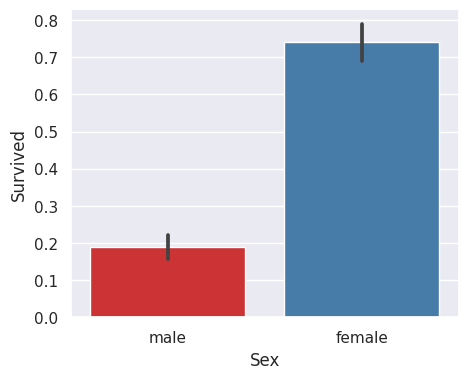

In [391]:
sns.set_style("darkgrid")
plt.figure(figsize = (5,4)) #ukuran 
sns.barplot(x="Sex",y="Survived",data=train,palette='Set1') #definisikan sumbu x dan y
plt.show()

#Simpulan: Berdasarkan barplot dapat disimpulkan bahwa female lebih dapat survived dibandingkan dengan male

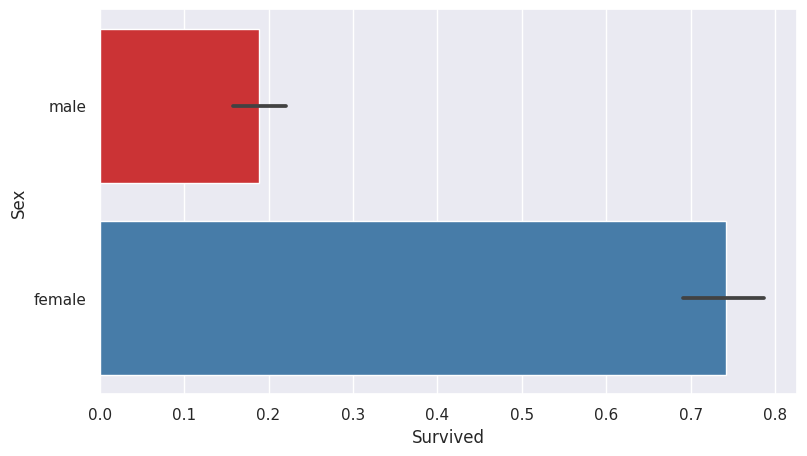

In [392]:
sns.set_style("darkgrid")
plt.figure(figsize = (9,5)) #ukuran 
sns.barplot(y='Sex', x='Survived', data=train, palette='Set1') #definisikan sumbu x dan y
plt.show()


#Simpulan: Berdasarkan barplot dapat disimpulkan bahwa female lebih dapat survived dibandingkan dengan male

In [393]:
#Cara2(mengambil data bedasarkan dataframe yang sudah dipisahkan antara numerik dan kategorik)

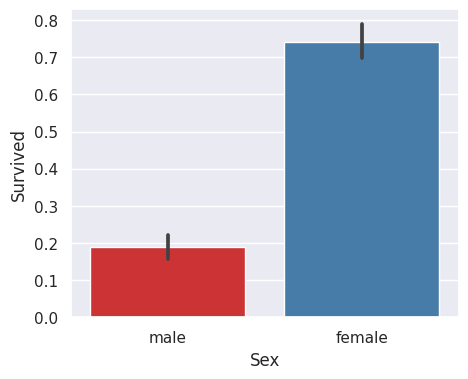

In [394]:
sns.set_style("darkgrid")
plt.figure(figsize = (5,4)) #ukuran
sns.barplot(x=categorical_data['Sex'], y=numerical_data['Survived'], data=train, palette='Set1') #definisikan sumbu x dan y
plt.show()

#Simpulan: Berdasarkan barplot dapat disimpulkan bahwa female lebih dapat survived dibandingkan dengan male

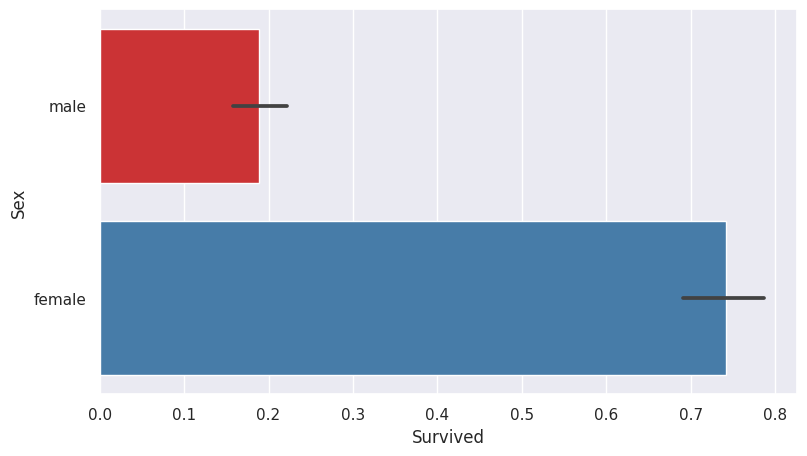

In [395]:
sns.set_style("darkgrid")
plt.figure(figsize = (9,5)) #ukuran
sns.barplot(x=numerical_data['Survived'], y=categorical_data['Sex'],data=train, palette='Set1') #definisikan sumbu x dan y
plt.show()


#Simpulan: Berdasarkan barplot dapat disimpulkan bahwa female lebih dapat survived dibandingkan dengan male

###### Histplot

In [396]:
#Cara1(langsung bedasarkan dataframe)

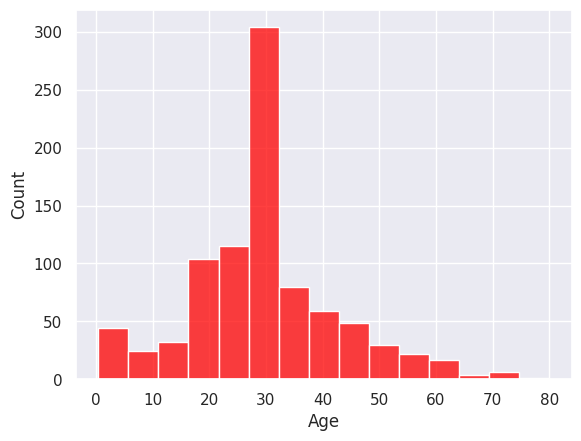

In [397]:
sns.set(style="darkgrid")
sns.histplot(x='Age', data=train, color='Red', bins=15) #definisikan sumbu x 
plt.show()

#Simpulan: Usia paling banyak yang ada pada transportasi tersebut yaitu 30 tahun-an

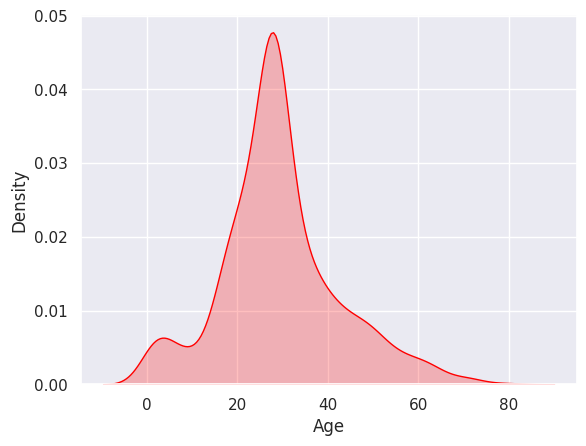

In [398]:
sns.set(style="darkgrid")
sns.kdeplot(x="Age", data=train, shade=True, color='Red') #definisikan sumbu x, shade untuk mengisi luas hisplot
plt.show()

#Simpulan: Usia paling banyak yang ada pada transportasi tersebut yaitu 30 tahun-an

In [399]:
#Cara2(mengambil data bedasarkan dataframe yang sudah dipisahkan antara numerik dan kategorik)

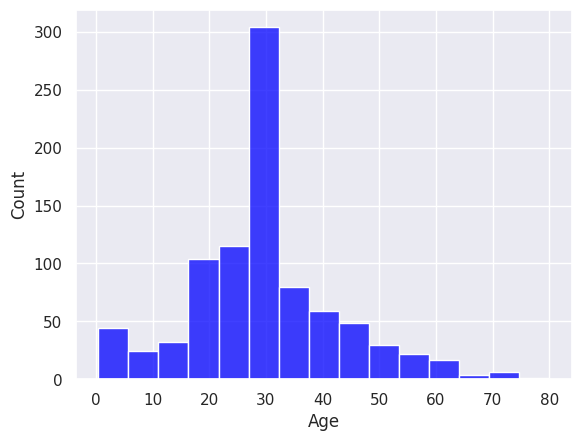

In [400]:
sns.set(style="darkgrid")
sns.histplot(x= numerical_data['Age'], data=train, color='Blue', bins=15) #definisikan sumbu x
plt.show()

#Simpulan: Usia paling banyak yang ada pada transportasi tersebut yaitu 30 tahun-an

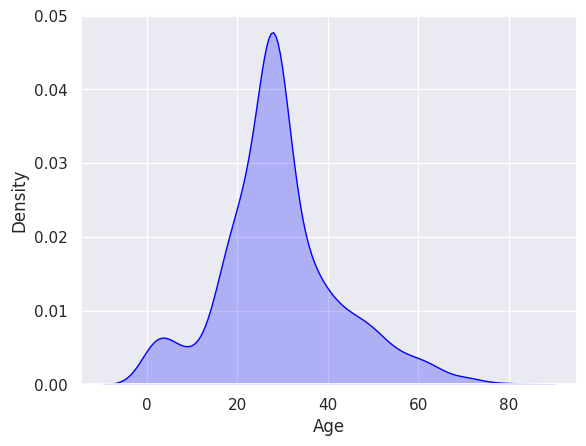

In [401]:
sns.set(style="darkgrid")
sns.kdeplot(x=numerical_data["Age"], data=train, shade=True, color='Blue') #definisikan sumbu x, shade untuk mengisi luas hisplot
plt.show()

#Simpulan: Usia paling banyak yang ada pada transportasi tersebut yaitu 30 tahun-an

###### Boxplot

######Age

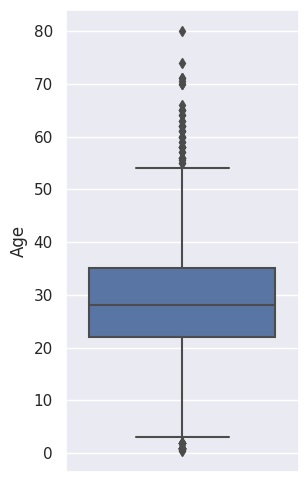

In [402]:
plt.figure(figsize=(3,6))
sns.boxplot(y='Age', data=train, orient='v') #definisikan sumbu y, dengan boxplot vertikal
plt.show()

#Simpulan : Rata-rata usia yang membeli tiket transportasi tersebut berada di sekitar usia 28 tahun dan terdapat pencilan diatas maupun dibawah

######Fare

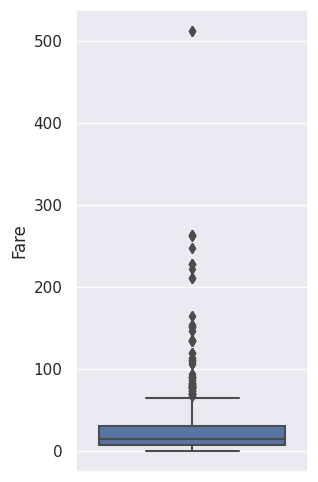

In [403]:
plt.figure(figsize=(3,6))
sns.boxplot(y='Fare', data=train, orient='v') #definisikan sumbu y, dengan boxplot vertikal
plt.show()

#Simpulan : Rata-rata pembelian tiket berada di bawah 50 dan terdapat pencilan diatas 500

In [404]:
#melihat kolom dataframe "Fare" dan "Age" pada 5 kolom pertama
train[['Fare','Age']].head()

,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0


In [405]:
#membuat dataframe baru untuk di-compare
train_compare=train[['Fare','Age']]
train_compare.head()

,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0


In [406]:
train_30_60 = train_compare[train_compare.Age.isin([30,40,50,60])] #compare "Age" dari usia 30 - 60 tahun
train_30_60.head()

,Fare,Age
30,27.7208,40.0
40,9.4750,40.0
79,12.4750,30.0
157,8.0500,30.0
161,15.7500,40.0


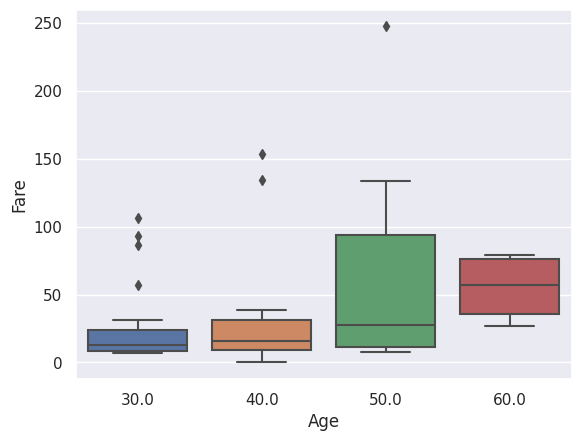

In [407]:
#compare boxplot antara Age dengan Fare
sns.boxplot(y='Fare', x='Age', data=train_30_60) #definisikan x dan y
plt.show()

##simpulan 
#1. Nilai tengah pembelian tiket dari usia 30,40,50,dan 60, semakin bertambah usia semakin bertambah nilai tengahnya
#2. Pada usia 60 tahun tidak ada pencilan terhadap fare, sedangkan pada umur lainnya terdapat pencilan

###### Scatterplot

In [408]:
#Cara1(langsung bedasarkan dataframe)

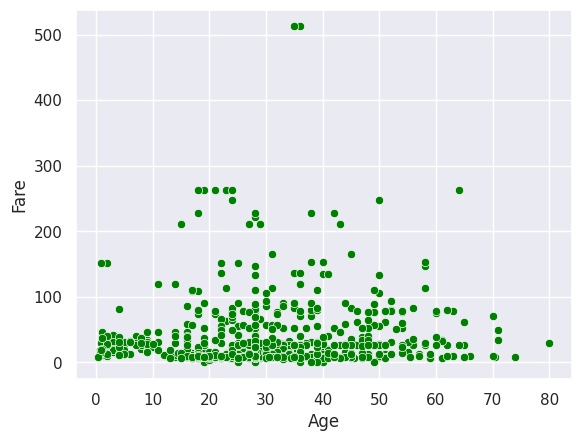

In [409]:
sns.scatterplot(x='Age', y='Fare', data=train, color='Green') #definisikan x dan y
plt.show()

In [410]:
#korelasi antara "Age" dan "Fare"
train[['Age','Fare']].corr()

#mempunyai korelasi 0.096688 yang artinya, korelasi antara Age dan Fare lemah

,Age,Fare
Age,1.000000,0.096688
Fare,0.096688,1.000000


In [411]:
#Cara2(mengambil data bedasarkan dataframe yang sudah dipisahkan antara numerik dan kategorik)

<Axes: xlabel='Age', ylabel='Fare'>

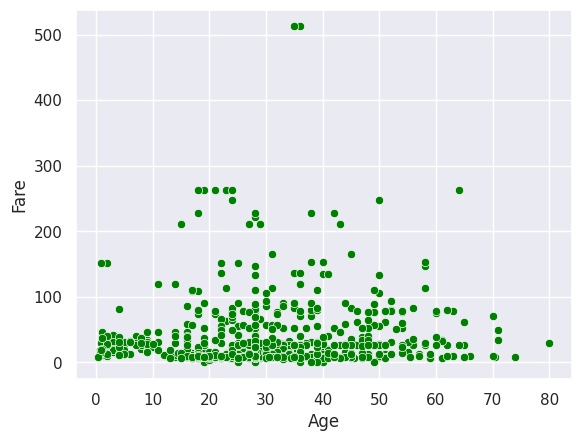

In [412]:
sns.scatterplot(x=numerical_data['Age'], y=numerical_data['Fare'], data=train, color='Green') #defisnikan x dan y

In [413]:
#korelasi antara "Age" dan "Fare"
train[['Age','Fare']].corr()

#mempunyai korelasi 0.096688 yang artinya, korelasi antara Age dan Fare lemah

,Age,Fare
Age,1.000000,0.096688
Fare,0.096688,1.000000


###### Pie Chart

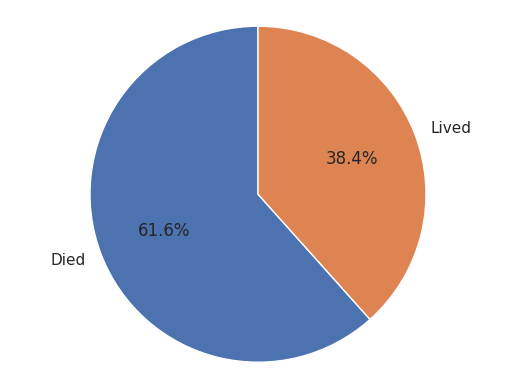

In [414]:
# Jumlahkan died dan lived dalam dataset
died_count = len(train[train['Survived'] == 0])
lived_count = len(train[train['Survived'] == 1])

# Buat Pie Chart bedasarkan penjumlahan diatas
labels = ["Died", "Lived"]
sizes = [died_count, lived_count]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show() #show chart